In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import struct
import pickle
from models import *
import importlib 

In [26]:
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num_images, rows, cols)
    return images

# Reads the MNIST label file and returns a NumPy array with the labels.
def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Load train set
train_images = load_mnist_images('./mnist/train-images.idx3-ubyte')
train_labels = load_mnist_labels('./mnist/train-labels.idx1-ubyte')
# Load test set
test_images = load_mnist_images('./mnist/t10k-images.idx3-ubyte')
test_labels = load_mnist_labels('./mnist/t10k-labels.idx1-ubyte')

In [27]:
print(f"Training Images Shape {train_images.shape}")
print(f"Training Labels Shape {train_labels.shape}")
print(f"Test Images Shape {test_labels.shape}")
print(f"Test Labels Shape {test_labels.shape}")

Training Images Shape (60000, 28, 28)
Training Labels Shape (60000,)
Test Images Shape (10000,)
Test Labels Shape (10000,)


In [28]:
# Putting the data in a best-known format.
# Train set
X = train_images
X = X.reshape(-1,28*28)
Y = train_labels
Y = Y.reshape(-1,1)

# Test set
X_test = test_images
X_test = X_test.reshape(-1,28*28)
Y_test = test_labels
Y_test = Y_test.reshape(-1,1)

In [29]:
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)


(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [30]:
def onehot_coder_notebook(Y):
    n_classes = np.max(Y) + 1
    y_hot = np.eye(n_classes,dtype=int)[Y]
    return y_hot.squeeze()

In [31]:
initializer = initialize_parameters(input_size=784, hidden_layer1_size=50, hidden_layer2_size=20 , output_size=10)
print(initializer)

{'W1': array([[ 0.00942321,  0.01048337, -0.00189285, ...,  0.01485701,
         0.01026521,  0.00579905],
       [ 0.00702972, -0.00329508, -0.00216642, ..., -0.00913628,
        -0.00248215,  0.0002006 ],
       [-0.00860695, -0.00617951, -0.01035055, ..., -0.01533817,
         0.00328352,  0.0006144 ],
       ...,
       [ 0.00882848,  0.00468966, -0.00787271, ..., -0.00113628,
        -0.00351123,  0.00264552],
       [-0.00502857,  0.0057756 ,  0.01438355, ...,  0.00734832,
        -0.01818192, -0.01707516],
       [-0.0151907 ,  0.00361521, -0.00160867, ..., -0.00653123,
         0.02041735,  0.01556099]]), 'b1': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]]), 'W2': array([[-7.04084102e-03,  1.34201564e-03,  1.76023963e-02,
         1.54128143e-02, -8.49201703e-04, -4.72040848e-03,
         1.487

In [32]:
def train_notebook(X,Y,input_size, hidden_layer1_size, hidden_layer2_size, output_size, learning_rate, epochs, batch_size, weights):
    #Inputs Data
    m = X.shape[0]
    Y = onehot_coder_notebook(Y)
    cost = []
    epoch_list = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        # Using Mini-Batch:
        for i in range(0,m,batch_size):
            #Batch Sample
            X_batch = X_shuffled[i:i+batch_size] #i + batch_size - i = batch_size
            Y_batch = Y_shuffled[i:i+batch_size]
            # Forward propagation with the batch sample
            forward_data = forward_prop(X_batch,weights)
            # Perform backpropagation
            gradients = backward_prop(X_batch,Y_batch,forward_data,weights)
            # Update weights
            weights = update_weights(weights,gradients,learning_rate)

        #Calculate cost for each iterations:
        forward_data_full = forward_prop(X,weights)
        _,_,_,_,_, A3 = forward_data_full
        epoch_cost = compute_cost(A3,Y)
        #Print cost for each multiple of 10 epoch count:
        if epoch % 10 == 0:
            print(f'Epoch {epoch},cost: {epoch_cost}')
            cost.append(epoch_cost)
            epoch_list.append(epoch)
    
    return weights,cost,epoch_list

In [33]:
X_norm = X/ 255
model1,cost1,epoch_list_1 = train_notebook(X_norm,Y,input_size=784, hidden_layer1_size=50, hidden_layer2_size=20 ,output_size=10,learning_rate=0.005, epochs=100, batch_size=60000,weights=initializer)

Epoch 0,cost: 2.302589430152397
Epoch 10,cost: 2.3025467615315303
Epoch 20,cost: 2.302513812183135
Epoch 30,cost: 2.302492021253269
Epoch 40,cost: 2.3024739617907746
Epoch 50,cost: 2.3024570907797535
Epoch 60,cost: 2.3024410733384824
Epoch 70,cost: 2.302425726520748
Epoch 80,cost: 2.302410781963305
Epoch 90,cost: 2.302396071625824


In [35]:
Y_pred_test = predict(X_test,model1).reshape(-1,1)
Y_hat = predict(X,model1).reshape(-1,1)
print(f'Accuracy on Test: {np.mean(Y_test == Y_pred_test)}')
print(f'Accuracy on Train: {np.mean(Y == Y_hat)}')

Accuracy on Test: 0.075
Accuracy on Train: 0.07833333333333334


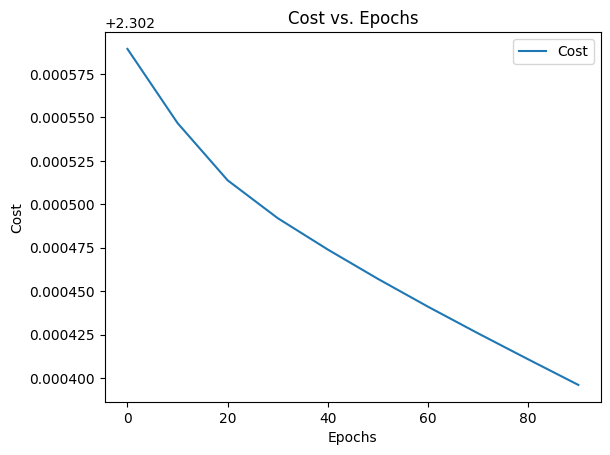

In [36]:
plt.plot(epoch_list_1,cost1, label="Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs. Epochs")
plt.legend()
plt.show()

### Decrease but a little

In [37]:
model2,cost2,epoch_list_2 = train_notebook(X,Y,input_size=784, hidden_layer1_size=50, hidden_layer2_size=20 ,output_size=10,learning_rate=0.005, epochs=100, batch_size=60000,weights=initializer)

Epoch 0,cost: 2.3034960096238244
Epoch 10,cost: 2.28537196725377
Epoch 20,cost: 2.2505583167907264
Epoch 30,cost: 2.1626047988563304
Epoch 40,cost: 1.9529693839841353
Epoch 50,cost: 1.5505384725888136
Epoch 60,cost: 1.1188030990316846
Epoch 70,cost: 0.8752731555452163
Epoch 80,cost: 1.004513755733956
Epoch 90,cost: 0.9146582096020671


In [40]:
Y_pred_test = predict(X_test,model2).reshape(-1,1)
Y_hat = predict(X,model2).reshape(-1,1)
print(f'Accuracy on Test: {np.mean(Y_test == Y_pred_test)}')
print(f'Accuracy on Train: {np.mean(Y == Y_hat)}')

Accuracy on Test: 0.8067
Accuracy on Train: 0.7993833333333333


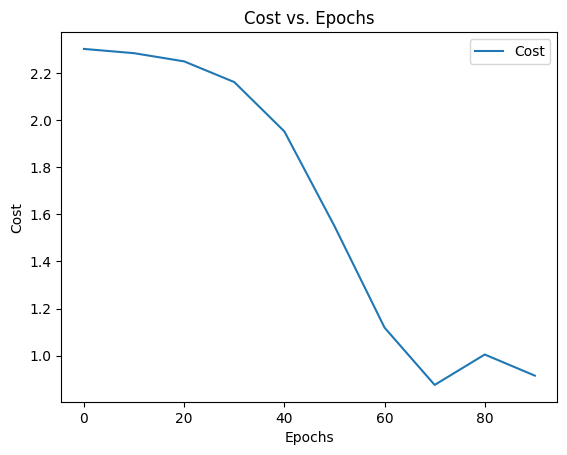

In [38]:
plt.plot(epoch_list_2,cost2, label="Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs. Epochs")
plt.legend()
plt.show()

In [41]:
model3,cost3,epoch_list_3 = train_notebook(X,Y,input_size=784, hidden_layer1_size=50, hidden_layer2_size=20 ,output_size=10,learning_rate=0.005, epochs=31, batch_size=64,weights=initializer)


Epoch 0,cost: 0.2286392644712043
Epoch 10,cost: 0.06136577666843009
Epoch 20,cost: 0.01810494618028903
Epoch 30,cost: 0.05408933860303143


In [42]:
Y_pred_test = predict(X_test,model3).reshape(-1,1)
Y_hat = predict(X,model3).reshape(-1,1)
print(f'Accuracy on Test: {np.mean(Y_test == Y_pred_test)}')
print(f'Accuracy on Train: {np.mean(Y == Y_hat)}')

Accuracy on Test: 0.9645
Accuracy on Train: 0.9871


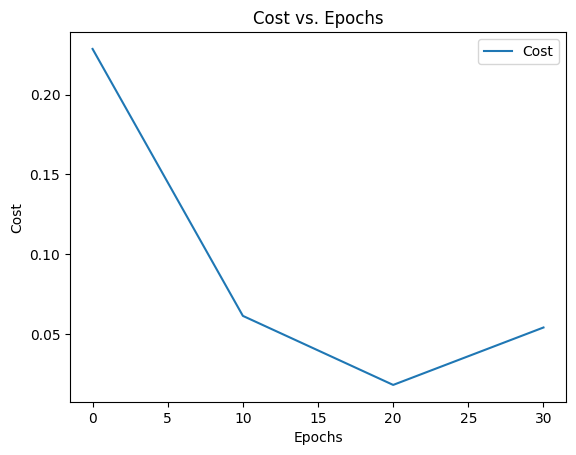

In [43]:
plt.plot(epoch_list_3,cost3, label="Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs. Epochs")
plt.legend()
plt.show()